In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [5]:
def moving_average(d, extra_periods = 1, n=3):
    #historical period length
    cols = len(d)
    #append np.nan into the demand array to cover future periods
    d = np.append(d,[np.nan]*extra_periods)
    #define the forecast array
    f = np.full(cols+extra_periods, np.nan)

    #create all the t+1 forecast untill end of historical period
    for t in range(n, cols):
        f[t] = np.mean(d[t-n:t])

    #forecast for all extra periods
    f[t+1:] = np.mean(d[t-n+1:t+1])

    #return a dataframe with the demand, forecast, and error
    df = pd.DataFrame.from_dict({'Demand':d, 'Forecast': f, 'Error': d-f})
    return(df)


In [6]:


d = [37,60,85,112,132,145,179,198,150,132]
data = moving_average(d, extra_periods=1)
data


Demand    Forecast      Error
0     37.0         NaN        NaN
1     60.0         NaN        NaN
2     85.0         NaN        NaN
3    112.0   60.666667  51.333333
4    132.0   85.666667  46.333333
5    145.0  109.666667  35.333333
6    179.0  129.666667  49.333333
7    198.0  152.000000  46.000000
8    150.0  174.000000 -24.000000
9    132.0  175.666667 -43.666667
10     NaN  160.000000        NaN

<AxesSubplot:title={'center':'Moving Average'}>

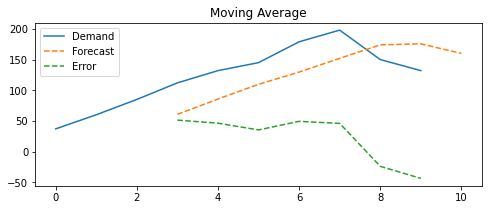

In [7]:
data[['Demand','Forecast','Error']].plot(figsize=(8,3), title = 'Moving Average', style = ['-','--','--'])

In [8]:
def kpi(df):
    #average demand
    dem_ave = df.loc[df['Error'].notnull(), 'Demand'].mean()
    #absolute bias
    bias_abs = df['Error'].mean()
    #relative bias
    bias_rel = bias_abs / dem_ave
    #print results 
    print('Bias: {:0.2f}, {:.2%}'.format(bias_abs, bias_rel))

    #calculate MAPE
    MAPE = (df['Error'].abs() / df['Demand']).mean()
    #print results
    print('MAPE: {:0.2%}'.format(MAPE))

    #calculate absoltue and scaled MAE
    MAE_abs = df['Error'].abs().mean()
    MAE_rel = MAE_abs / dem_ave
    #print results
    print('MAE: {:0.2f}, {:0.2%}'.format(MAE_abs,MAE_rel))

    #calculate absolute and scaled RSME
    RMSE_abs = np.sqrt((df['Error']**2).mean())
    RMSE_rel =  RMSE_abs / dem_ave
    #print results
    print('RMSE: {:0.2f}, {:0.2%}'.format(RMSE_abs,RMSE_rel))

    

In [9]:
kpi(data)

Bias: 22.95, 15.33%
MAPE: 29.31%
MAE: 42.29, 28.24%
RMSE: 43.20, 28.85%
